<a href="https://colab.research.google.com/github/MazharRehan/FYP-FP-Generator-Model/blob/feature%2Fdata-reprocessing/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up Your Environment on Google Colab
Connect to a GPU runtime

Go to the top menu: Runtime > Change Runtime Type > Hardware Accelerator > GPU

In [ ]:
!pip install opencv-python pillow matplotlib

# Step 2: Upload Your Floor Plan Image
# Step 3: Load the Image

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

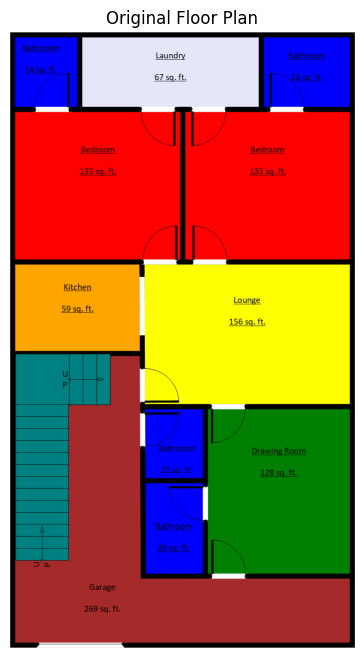

In [ ]:
# Load the image
image_path = "/content/5Marla_GF_FP_005_V01.png"  # Replace with your image path
img = cv2.imread(image_path)

# Convert BGR (OpenCV default format) to RGB for visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Floor Plan")
plt.show()

Step 4: Normalize the Image Size

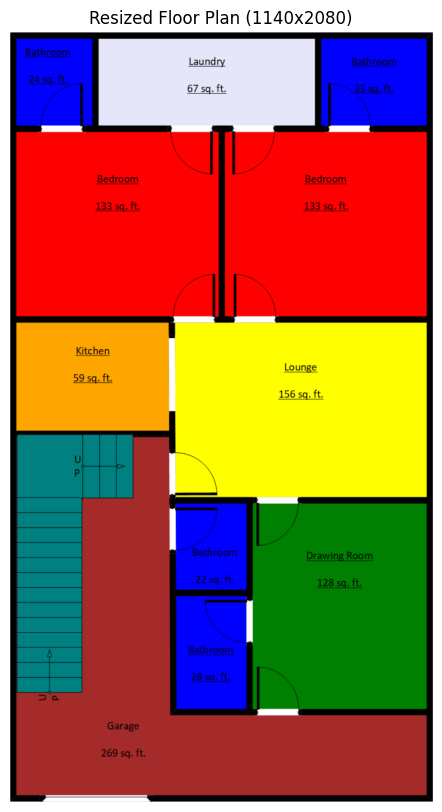

In [ ]:
# Resize the image to a standard size (1140x2080)
resized_img = cv2.resize(img, (1140, 2080))

# Display the resized image
plt.figure(figsize=(10, 10))  # Adjust figsize for a better view
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Resized Floor Plan (1140x2080)")
plt.show()

Step 5: Normalize Pixel Values

Normalized pixel values. Shape: (2080, 1140, 3)


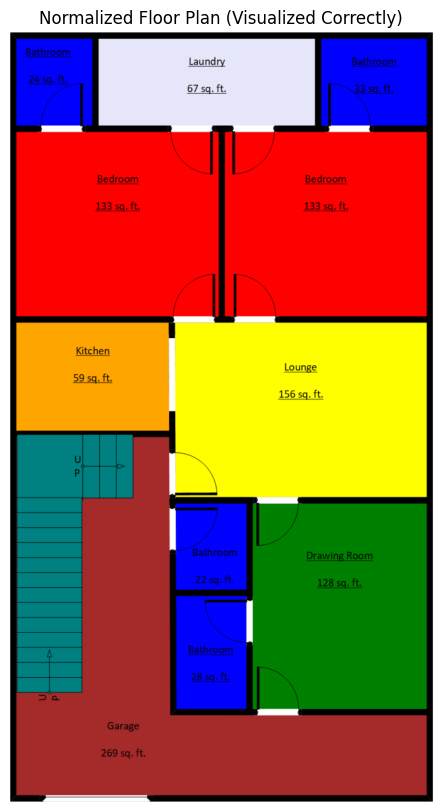

In [ ]:
# Normalize pixel values to range [0, 1]
normalized_img = resized_img / 255.0
print("Normalized pixel values. Shape:", normalized_img.shape)

# Rescale normalized image back to [0, 255] for visualization
visualize_img = (normalized_img * 255).astype(np.uint8)

# Display the normalized image with corrected colors
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(visualize_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Normalized Floor Plan (Visualized Correctly)")
plt.show()

Step 6: Extract Room Colors

1.   Define the color codes:

In [ ]:
# RGB color coding for rooms
color_map = {
    "Bedroom": (255, 0, 0),                # Red
    "Bathroom": (0, 0, 255),               # Blue
    "Kitchen": (255, 165, 0),              # Orange
    "Drawing Room": (0, 128, 0),           # Green
    "Garage": (165, 42, 42),               # Brown
    "Lounge": (255, 255, 0),               # Yellow
    "Backyard": (50, 205, 50),             # Lime Green
    "Stairs": (0, 128, 128),               # Teal
    "Store": (128, 0, 128),                # Purple
    "Open Space": (0, 255, 255),           # Cyan
    "Prayer Room": (127, 127, 127),        # Crimson
    "Staircase": (153, 51, 255),           # RGB(153, 51, 255)
    "Lobby": (255, 0, 255),                # Magenta
    "Lawn": (64, 224, 208),                # Turquoise
    "Dining": (255, 192, 203),             # Pink
    "Servant Quarters": (75, 0, 130),      # Indigo
    "Passage": (128, 128, 0),              # Olive Green
    "Laundry": (230, 230, 250),            # Lavender
    "Dressing Area": (255, 127, 80),       # Coral
    "Side Garden": (255, 215, 0),          # Gold
    "Library": (255, 191, 0),              # Amber
    "Wall": (0, 0, 0),                     # Black
    "Door": (0, 0, 0),                     # Black
}


2.   Extract each room based on its color:

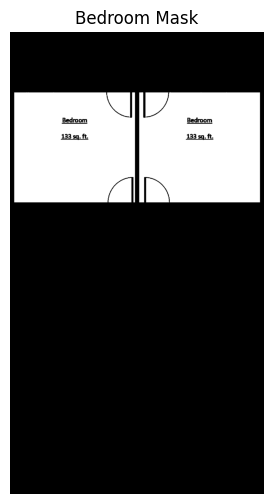

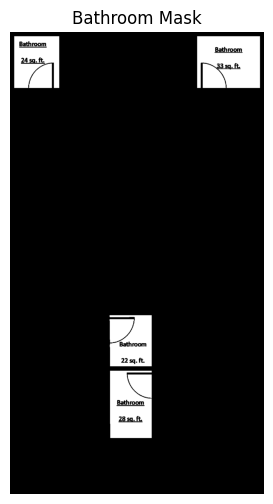

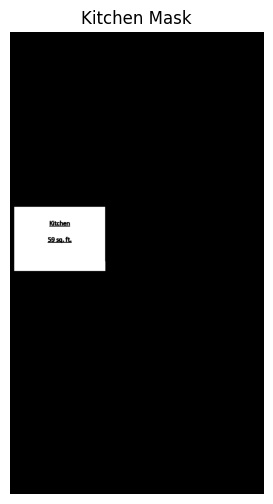

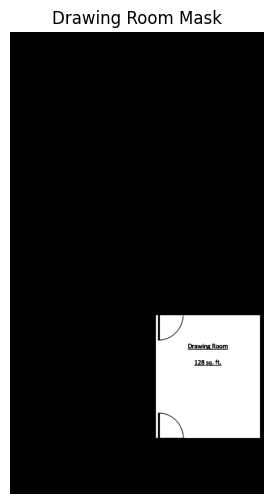

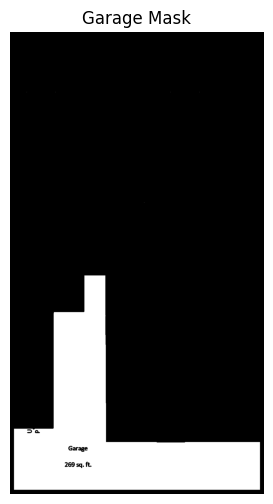

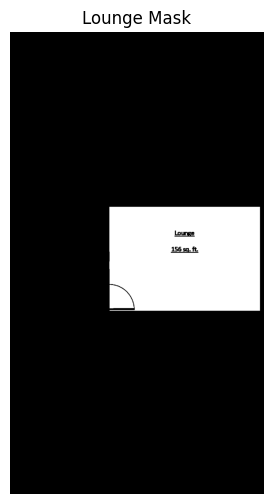

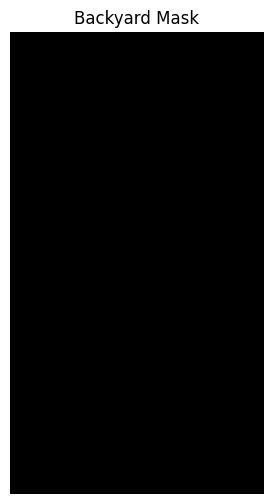

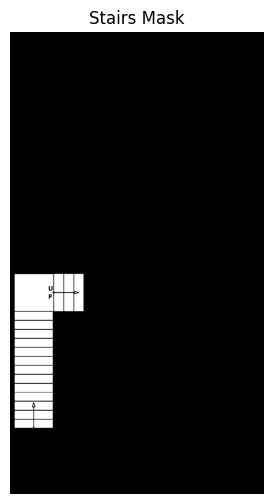

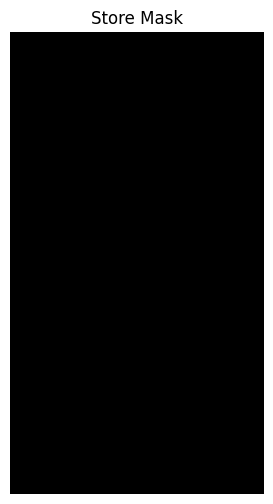

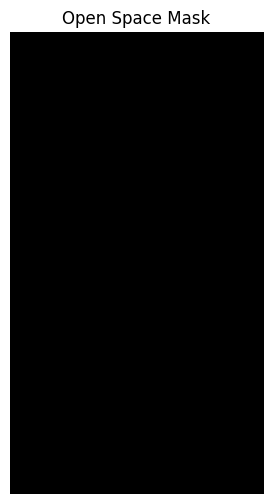

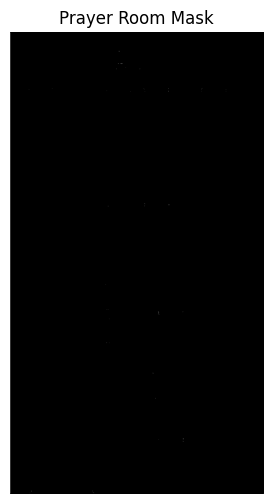

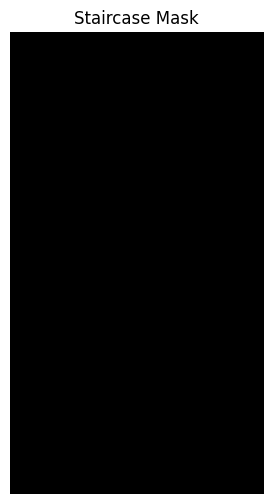

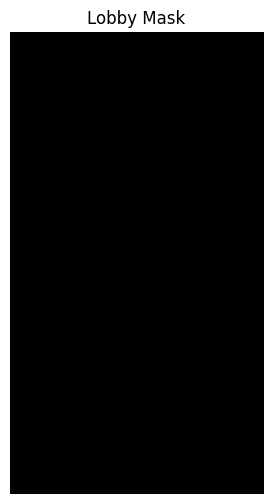

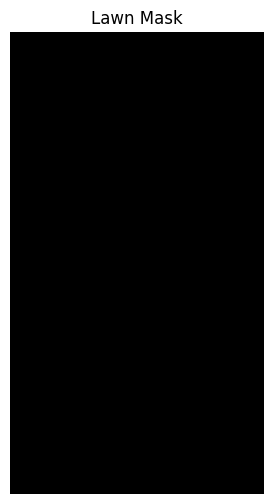

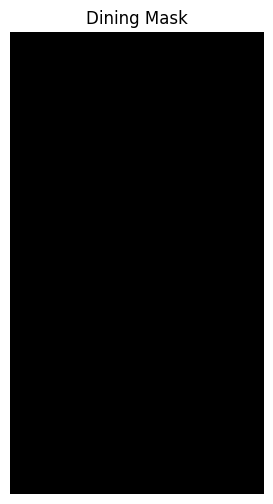

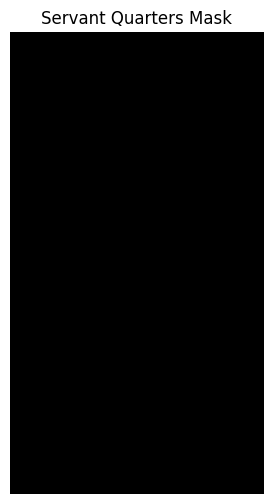

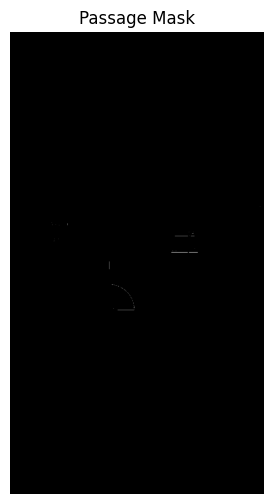

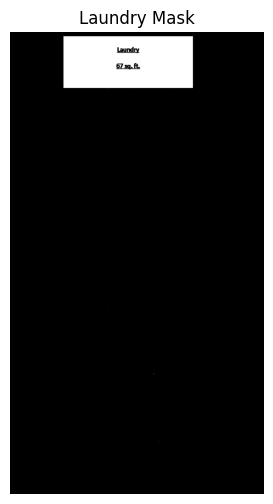

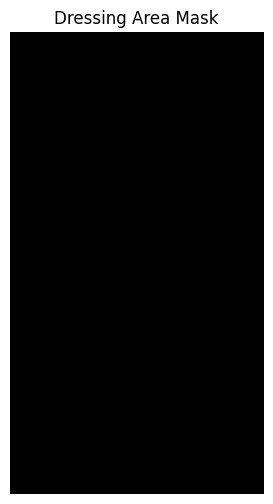

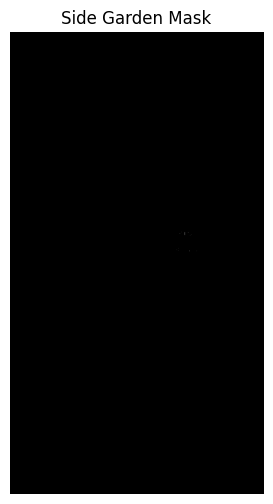

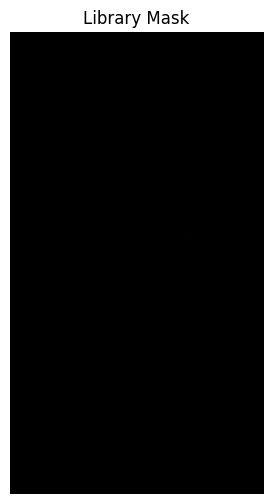

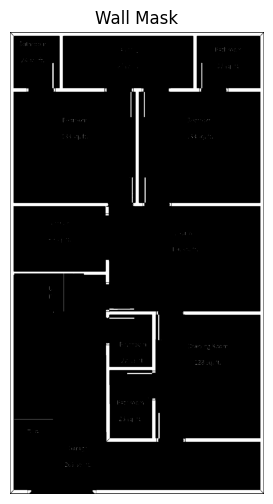

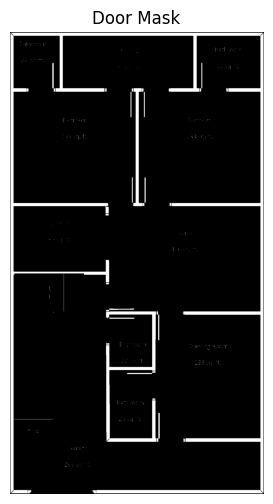

In [ ]:
for room, color in color_map.items():
    # Convert RGB to BGR for OpenCV
    bgr_color = color[::-1]
    # Create a binary mask for the room
    mask = cv2.inRange(resized_img, np.array(bgr_color) - 10, np.array(bgr_color) + 10)

    # Display the mask
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap="gray")
    plt.title(f"{room} Mask")
    plt.axis("off")
    plt.show()

Step 7: Calculate Room Areas
1. Define the total image size (e.g., 5 Marla is 25 x 45 feet):

In [ ]:
# Plot size dimensions in feet
plot_width_ft = 25
plot_height_ft = 45

# Area per pixel in square feet
total_pixels = resized_img.shape[0] * resized_img.shape[1]
area_per_pixel = (plot_width_ft * plot_height_ft) / total_pixels

print("Area per pixel (sq. ft.):", area_per_pixel)

Area per pixel (sq. ft.): 0.00047444331983805666


2. Calculate the room areas:

In [ ]:
for room, color in color_map.items():
    # Create a binary mask for the room
    bgr_color = color[::-1]
    mask = cv2.inRange(resized_img, np.array(bgr_color) - 10, np.array(bgr_color) + 10)

    # Count non-zero pixels in the mask
    room_pixels = cv2.countNonZero(mask)

    # Calculate the area in square feet
    room_area = room_pixels * area_per_pixel
    print(f"{room} Area: {room_area:.2f} sq. ft.")

Bedroom Area: 248.33 sq. ft.
Bathroom Area: 91.85 sq. ft.
Kitchen Area: 54.54 sq. ft.
Drawing Room Area: 119.10 sq. ft.
Garage Area: 188.53 sq. ft.
Lounge Area: 147.75 sq. ft.
Backyard Area: 0.00 sq. ft.
Stairs Area: 62.10 sq. ft.
Store Area: 0.00 sq. ft.
Open Space Area: 0.00 sq. ft.
Prayer Room Area: 1.03 sq. ft.
Staircase Area: 0.00 sq. ft.
Lobby Area: 0.00 sq. ft.
Lawn Area: 0.00 sq. ft.
Dining Area: 0.00 sq. ft.
Servant Quarters Area: 0.00 sq. ft.
Passage Area: 0.25 sq. ft.
Laundry Area: 62.83 sq. ft.
Dressing Area Area: 0.00 sq. ft.
Side Garden Area: 0.01 sq. ft.
Library Area: 0.00 sq. ft.
Wall Area: 80.36 sq. ft.
Door Area: 80.36 sq. ft.


Step 8: Save Preprocessed Data
1. Save the resized image:

In [ ]:
cv2.imwrite("resized_floor_plan.png", (normalized_img * 255).astype("uint8"))
print("Resized and normalized image saved.")

Resized and normalized image saved.


2. Save the metadata:

In [ ]:
import json

# Example metadata
metadata = {
    "PlotSize": "5 Marla",
    "TotalArea": 1125,  # Total area in sq. ft.
    "Rooms": {
        "Bedroom": 2,
        "Bathroom": 3,
        "Kitchen": 1,
        "Lounge": 1,
        "Garage": 1
    },
    "RoomAreas": {
        "Bedroom": [133, 133],
        "Bathroom": [24, 33, 22],
        "Kitchen": [59],
        "Lounge": [156],
        "Garage": [269]
    }
}

# Save metadata as a JSON file
with open("floor_plan_metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

print("Metadata saved as floor_plan_metadata.json.")

Metadata saved as floor_plan_metadata.json.
